In [186]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt 

data = pd.read_csv('mammographic_masses.data.txt')

data.head()

,5,67,3,5.1,3.1,1
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


In [187]:
data = pd.read_csv('mammographic_masses.data.txt', na_values = ['?'])
data.head()

,5,67,3,5.1,3.1,1
0,4.0,43.0,1.0,1.0,NaN,1
1,5.0,58.0,4.0,5.0,3.0,1
2,4.0,28.0,1.0,1.0,3.0,0
3,5.0,74.0,1.0,5.0,NaN,1
4,4.0,65.0,1.0,NaN,3.0,0


In [188]:
data.columns = ['BI-RADS assessment', 'Age', 'Shape', 'Margin', 'Density', 'Severity']
data.head()

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
0,4.0,43.0,1.0,1.0,NaN,1
1,5.0,58.0,4.0,5.0,3.0,1
2,4.0,28.0,1.0,1.0,3.0,0
3,5.0,74.0,1.0,5.0,NaN,1
4,4.0,65.0,1.0,NaN,3.0,0


In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BI-RADS assessment  958 non-null    float64
 1   Age                 955 non-null    float64
 2   Shape               929 non-null    float64
 3   Margin              912 non-null    float64
 4   Density             884 non-null    float64
 5   Severity            960 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 45.1 KB


In [190]:
data.describe()

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
count,958.000000,955.000000,929.000000,912.000000,884.000000,960.000000
mean,4.347599,55.475393,2.721206,2.793860,2.910633,0.462500
std,1.783838,14.482917,1.243428,1.565702,0.380647,0.498852
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


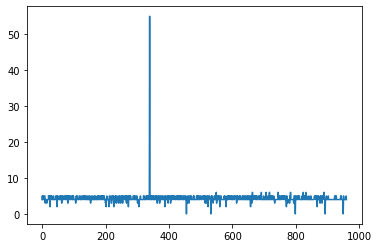

In [191]:
plt.plot(data['BI-RADS assessment'])

In [192]:
data['BI-RADS assessment'].iloc[300:350]

300     4.0
301     3.0
302     4.0
303     4.0
304     4.0
305     2.0
306     4.0
307     4.0
308     4.0
309     4.0
310     5.0
311     4.0
312     4.0
313     4.0
314     4.0
315     4.0
316     4.0
317     4.0
318     4.0
319     4.0
320     5.0
321     4.0
322     5.0
323     4.0
324     4.0
325     4.0
326     4.0
327     4.0
328     5.0
329     5.0
330     4.0
331     5.0
332     5.0
333     4.0
334     5.0
335     5.0
336     5.0
337     4.0
338     4.0
339    55.0
340     5.0
341     4.0
342     4.0
343     4.0
344     5.0
345     4.0
346     5.0
347     5.0
348     4.0
349     5.0
Name: BI-RADS assessment, dtype: float64

In [193]:
data['BI-RADS assessment'].iloc[339]

55.0

In [194]:
print(data.iloc[339])

BI-RADS assessment    55.0
Age                   46.0
Shape                  4.0
Margin                 3.0
Density                3.0
Severity               1.0
Name: 339, dtype: float64


In [195]:
data = data.drop(339, axis=0)
data = data.reset_index(drop=True)
print(data[330:345])

     BI-RADS assessment   Age  Shape  Margin  Density  Severity
330                 4.0  51.0    1.0     1.0      3.0         0
331                 5.0  54.0    4.0     5.0      3.0         1
332                 5.0  55.0    4.0     3.0      3.0         1
333                 4.0  64.0    4.0     4.0      3.0         0
334                 5.0  67.0    4.0     5.0      3.0         1
335                 5.0  75.0    4.0     3.0      3.0         1
336                 5.0  87.0    4.0     4.0      3.0         1
337                 4.0  46.0    4.0     4.0      3.0         1
338                 4.0  59.0    2.0     1.0      NaN         0
339                 5.0  61.0    1.0     1.0      3.0         1
340                 4.0  44.0    1.0     4.0      3.0         0
341                 4.0  32.0    1.0     1.0      3.0         0
342                 4.0  62.0    1.0     1.0      3.0         0
343                 5.0  59.0    4.0     5.0      3.0         1
344                 4.0  61.0    4.0    

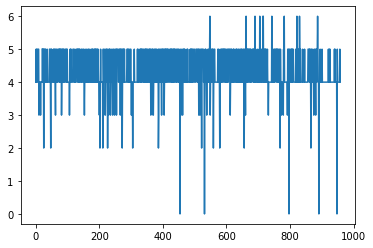

In [196]:
plt.plot(data['BI-RADS assessment'])

In [197]:
data.loc[(data['Age'].isnull()) | (data['Shape'].isnull()) |
        (data['Margin'].isnull()) |
        (data['Density'].isnull()) | (data['Severity'].isnull())]

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
0,4.0,43.0,1.0,1.0,NaN,1
3,5.0,74.0,1.0,5.0,NaN,1
4,4.0,65.0,1.0,NaN,3.0,0
5,4.0,70.0,NaN,NaN,3.0,0
6,5.0,42.0,1.0,NaN,3.0,0
...,...,...,...,...,...,...
776,4.0,60.0,NaN,4.0,3.0,0
817,4.0,35.0,3.0,NaN,2.0,0
822,6.0,40.0,NaN,3.0,4.0,1
882,5.0,NaN,4.0,4.0,3.0,1


In [198]:
data.dropna(inplace=True)
data.describe()

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
count,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000
mean,4.332126,55.780193,2.780193,2.810386,2.915459,0.484300
std,0.688184,14.680392,1.243117,1.567209,0.351336,0.500055
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.750000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,6.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [199]:
features = data[['Age', 'Shape', 'Margin', 'Density']].values
labels = data[['Severity']].values
features

array([[58.,  4.,  5.,  3.],
       [28.,  1.,  1.,  3.],
       [57.,  1.,  5.,  3.],
       ...,
       [64.,  4.,  5.,  3.],
       [66.,  4.,  5.,  3.],
       [62.,  3.,  3.,  3.]])

In [200]:
#normalize the attribute data
scaler = preprocessing.StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled

array([[ 0.15130035,  0.98184199,  1.39798661,  0.24077313],
       [-1.893477  , -1.43290603, -1.15586428,  0.24077313],
       [ 0.08314111, -1.43290603,  1.39798661,  0.24077313],
       ...,
       [ 0.56025582,  0.98184199,  1.39798661,  0.24077313],
       [ 0.69657431,  0.98184199,  1.39798661,  0.24077313],
       [ 0.42393733,  0.17692598,  0.12106117,  0.24077313]])

In [201]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.25)

In [202]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)

classifier.score(X_test, y_test)

0.7342995169082126

In [203]:
#Using k cross validation insteasd of just one train/test split to cover more data
#in my test and train sets
scores = cross_val_score(classifier, features_scaled, labels, cv=10)
print(scores)
print(scores.mean())

[0.73493976 0.75903614 0.72289157 0.74698795 0.77108434 0.71084337
 0.73493976 0.75903614 0.7804878  0.70731707]
0.7427563914193358


In [204]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0)
scores = cross_val_score(classifier, features_scaled, labels, cv=10)

print(scores)
print(scores.mean())

/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/mod

[0.71084337 0.79518072 0.79518072 0.79518072 0.79518072 0.73493976
 0.73493976 0.79518072 0.74390244 0.70731707]
0.7607846018219219


In [205]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', C=1.0)
scores = cross_val_score(classifier, features_scaled, labels, cv=10)
scores.mean()

/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed w

0.7983690861004995

In [206]:
from sklearn import neighbors
classifier = neighbors.KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(classifier, features_scaled, labels, cv=10)
scores.mean()

/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/

0.7801057890096973

In [207]:
for n in range(1,51):
    classifier = neighbors.KNeighborsClassifier(n_neighbors=n)
    scores = cross_val_score(classifier, features_scaled, labels, cv=10)
    print(n, scores.mean())

/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/

1 0.7148545401116662
2 0.6918454305024977
3 0.7438583602703497
4 0.7317807816632383
5 0.769277108433735


/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/

6 0.7475315897737291
7 0.7826329709080222
8 0.7680722891566265
9 0.7801645606817514
10 0.7801057890096973


/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/

11 0.7849838377901851
12 0.7813106082868058
13 0.7837937114310902
14 0.7813546870408463
15 0.7885982956215105


/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/

16 0.7777549221275345
17 0.7849985307081987
18 0.7825007346459006
19 0.7813106082868059
20 0.7788862768145755


/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/

21 0.7849838377901851
22 0.7837349397590362
23 0.7813546870408463
24 0.7837643255950633
25 0.7862180429033205


/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/

26 0.7849838377901851
27 0.7849985307081987
28 0.7922421392888628
29 0.7886276814575376
30 0.7861886570672936


/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/

31 0.7874081692624155
32 0.7886129885395239
33 0.784983837790185
34 0.786203349985307
35 0.7862033499853072


/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/

36 0.7874228621804291
37 0.7886423743755511
38 0.7850132236262122
39 0.7862180429033206
40 0.7862180429033206


/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/

41 0.7837937114310902
42 0.7813840728768733
43 0.7825888921539818
44 0.7825888921539818
45 0.7849985307081987


/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/

46 0.7849985307081987
47 0.7862033499853072
48 0.7898325007346461
49 0.7886276814575376
50 0.7922421392888628


/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/

In [208]:
from sklearn.naive_bayes import MultinomialNB
scaler = preprocessing.MinMaxScaler()
features_minmax = scaler.fit_transform(features_scaled)
classifier = MultinomialNB()

scores = cross_val_score(classifier, features_minmax, labels, cv=10)
scores.mean()

/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed w

0.7814722303849545

In [209]:
classifier = SVC(kernel='poly', C=1.0)
scores = cross_val_score(classifier, features_scaled, labels, cv=10)
scores.mean()

/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed w

0.7910960916838085

In [210]:
classifier = SVC(kernel='sigmoid', C=1.0)
scores = cross_val_score(classifier, features_scaled, labels, cv=10)
scores.mean()

/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed w

0.7379077284748751

In [211]:
classifier = SVC(kernel='rbf', C=1.0)
scores = cross_val_score(classifier, features_scaled, labels, cv=10)
scores.mean()

/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed w

0.8019688510138113

In [212]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
scores = cross_val_score(classifier,features_scaled, labels, cv=10)
scores.mean()

/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maanitsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed w

0.8068468997942991

In [219]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

def create_model():
    model = Sequential()
    #4-unit input layer
    model.add(Dense(4, input_dim=4, kernel_initializer='normal', activation='relu'))
    #Hidden layer doesn't help so commented out
    #model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    # This is the output layer of the neural network for the binary classification of 1(malignent) or 0(benign)
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    #Compile model
    #Adam optimizer works best
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [220]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

classifier = KerasClassifier(build_fn=create_model, epochs=100, verbose=0)
scores = cross_val_score(classifier, features_scaled, labels, cv=10)
print(scores.mean())

0.8032618284225463
